# Solution Graded Exercise 8: Hopfield Network model of associative memory

first name: ...

last name: ...

sciper: ...

date: ...

*Your teammate*

first name of your teammate: ...

last name of your teammate: ...

sciper of your teammate: ...


Note: You are allowed to discuss the concepts with your class mates. You are not allowed to share code. You have to understand every line of code you write in this notebook. We will ask you questions about your submission during a fraud detection session during the last week of the semester.

** Remember **

If you are asked for plots: The appearance of the plots (labelled axes, ** useful scaling **, etc.) is important!

If you are asked for discussions: Answer in a precise way and try to be concise. 


** Submission **

Rename this notebook to Ex8_FirstName_LastName_Sciper.ipynb and upload that single file on moodle before the deadline.

** Link to the exercise **

http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/hopfield-network.html

## \* \* \* \* Programming Notes : Copying and slicing lists and numpy arrays \* \* \* \*
We would like to take the opportunity to bring to your attention certain features of Python, that might lead to unwanted behaviour and serious mistakes, if one is not aware of them. 
Please check the Python Cheat Sheet file on the moodle (https://moodle.epfl.ch/mod/page/view.php?id=981134 Part 4 of the ipynb file) for some examples of the following notes:

* Assigning a list to a new variable does not create a copy of the list, but creates a variable that points to the list. This means that modifying the second variable, also modifies the original list.
* Assigning a slice of a list to a new variable, creates a copy of the list. Any modification to the sliced list does not modify the original.

Now when it comes to numpy arrays:
* Assigning a numpy array to a new variable does not create a copy of the array, but creates a variable that points to the array. This means that modifying the second variable, also modifies the original array. (same as above)
* Assigning a slice of a numpy array to a new variable creates a variable that points to the corresponding elements of the original array as well! (contrary to what we saw above!) This means that modifying the second variable, also modifies the original array!
* To copy the original array and ensure that it is not modified by any modification of its copied version, the method copy() should be used.

# Exercise 8.1. Getting started

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

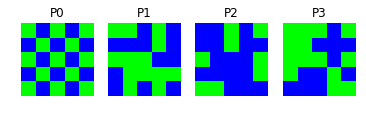

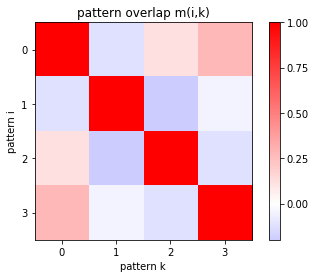

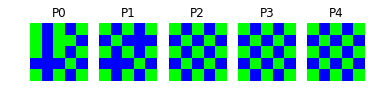

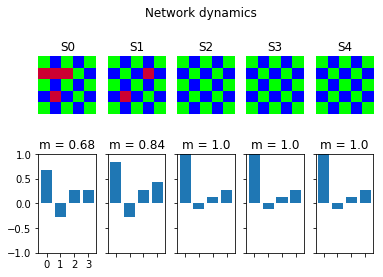

In [2]:
%matplotlib inline
from neurodynex.hopfield_network import network, pattern_tools, plot_tools

np.random.seed(324)

pattern_size = 5

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=4)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_pattern_list(states_as_patterns)
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")


# 8.3. Exercise: N=4x4 Hopfield-network
## 8.3.1. Question: Storing a single pattern
#### [2 + 2 + 3 points]

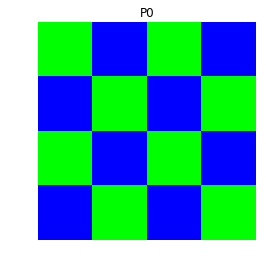

In [3]:
# write your code here 

def hopfield_sim(pattern_size,nr_flips,nr_steps,K):
    """This function runs a simulation of the hopfield model for 4 time steps
        INPUT:
        pattern_size -> length and width of the pattern
        nr_flips -> nr of flipped values between the initial state and the checkerboard
        nr_steps -> nr of steps the evolution of the model does
        K = number of total paterns to be stored"""
    hopfield_net = network.HopfieldNetwork(nr_neurons = pattern_size**2)
    factory = pattern_tools.PatternFactory(pattern_size,pattern_size)
    checkerboard = factory.create_checkerboard()
    pattern_list = [checkerboard]
    pattern_list.extend(factory.create_random_pattern_list(nr_patterns=K-1, on_probability=0.5))


    hopfield_net.store_patterns(pattern_list)

    noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips = nr_flips)
    hopfield_net.set_state_from_pattern(noisy_init_state)
    
    states = hopfield_net.run_with_monitoring(nr_steps=nr_steps)
    states_as_patterns = factory.reshape_patterns(states)
    
    return states_as_patterns, pattern_list

np.random.seed(324)
states_as_patterns, pattern_list = hopfield_sim(pattern_size = 4, nr_flips=5,nr_steps=4,K=1)
plot_tools.plot_pattern_list(pattern_list)

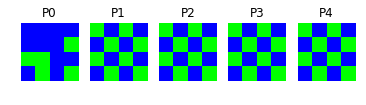

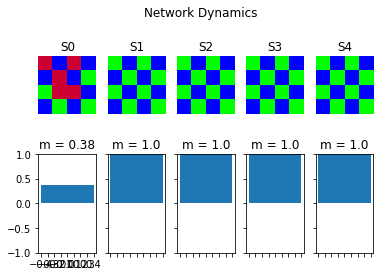

In [4]:
# Plot the sequence of network states along with the overlap of network state with the checkerboard
plot_tools.plot_pattern_list(states_as_patterns)
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list,reference_idx=0, suptitle="Network Dynamics")

Now test whether the network can still retrieve the pattern if we increase the number of flipped pixels. What happens at nr_flipped_pixels = 8, what if nr_flipped_pixels > 8 ?

Number of flips=8


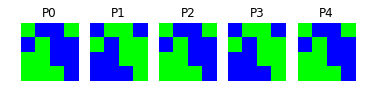

Number of flips=10


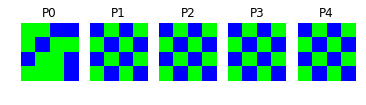

Number of flips=12


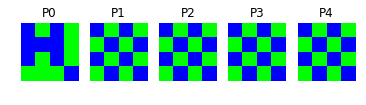

In [5]:
for i in range(8,13,2):
    states_as_patterns, pattern_list = hopfield_sim(pattern_size = 4, nr_flips=i,nr_steps=4,K=1)
    print("Number of flips={}".format(i))
    plot_tools.plot_pattern_list(states_as_patterns)

#### For 8 flips the state does not converge to the checkboard pattern,but at every step the system flips all its state with respect to its self. Indeed if we consider a pixel which has not been flipped with respect to the corresponding one on the original checkboard, when computing its state at the next step there will be 8 flipped contributions and 7 unflipped contributions: the pixel will be dominated by "wrong" contributions so it will be flipped with respect to the checkboard. Instead if we consider a pixel which has been flipped, its next state will be given by the contribution of 8 "correct" weights and 7 "incorrect" weights, so it will be as in the original checkboard. 
#### For more than 8 flips, the state converges to a checkboard pattern with all the pixels flipped with respect to the original one: indeed all the next states of the pixels are given by a dominant contribution of "incorrect" pixels. 

## 8.3.2. Question: the weights matrix
#### [1 + 3 + 2 points]

Uninitialized weights matrix


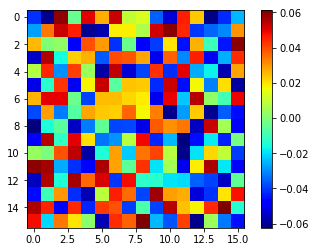

Weights matrix corresponding to the checkerboard


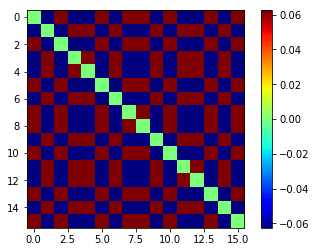

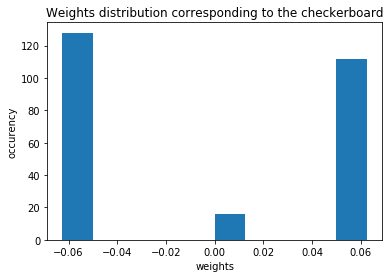

In [73]:
# write your code here: Bullet points 1-5 

pattern_size = 4

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)

# Visualize the weight matrix
print('Uninitialized weights matrix')
plot_tools.plot_nework_weights(hopfield_net, color_map='jet')

# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]
# store the checkerboard
hopfield_net.store_patterns(pattern_list)
# Visualize the weight matrix
plt.show()
print('Weights matrix corresponding to the checkerboard')
plot_tools.plot_nework_weights(hopfield_net, color_map='jet')
plt.figure()
plt.title('Weights distribution corresponding to the checkerboard')
plt.hist(hopfield_net.weights.flatten())
plt.xlabel('weights')
plt.ylabel('occurency')
plt.show()

#### The size of the matrix is 4x4 = 16

Weights matrix corresponding to L-shaped pattern


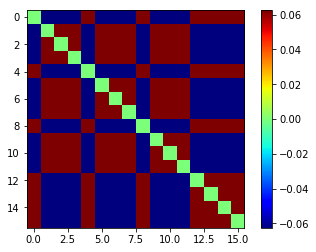

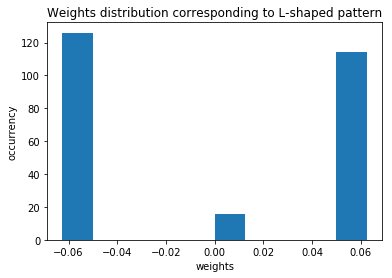

In [74]:
# write your code here: Bullet points 6-11


pattern_size = 4

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)

# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a L pattern and add it to the pattern list
l_pattern = factory.create_L_pattern()
pattern_list = [l_pattern]

# store the checkerboard
hopfield_net.store_patterns(pattern_list)
# Visualize the weight matrix
print('Weights matrix corresponding to L-shaped pattern')
plot_tools.plot_nework_weights(hopfield_net, color_map='jet')
plt.figure()
plt.title('Weights distribution corresponding to L-shaped pattern')
plt.hist(hopfield_net.weights.flatten())
plt.xlabel('weights')
plt.ylabel('occurrency')
plt.show()

Weights matrix corresponding to checkerboard + L-shaped pattern


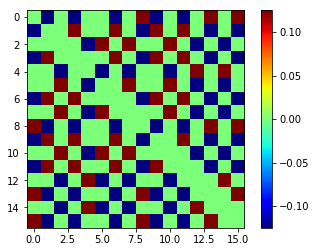

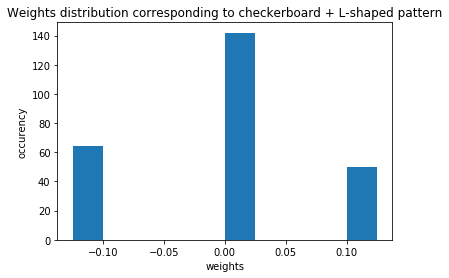

In [75]:
pattern_size = 4

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)

# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a L pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
l_pattern = factory.create_L_pattern()
pattern_list = [checkerboard,l_pattern]

# store the checkerboard
hopfield_net.store_patterns(pattern_list)
# Visualize the weight matrix
print('Weights matrix corresponding to checkerboard + L-shaped pattern')
plot_tools.plot_nework_weights(hopfield_net, color_map='jet')
plt.figure()
plt.title('Weights distribution corresponding to checkerboard + L-shaped pattern')
plt.hist(hopfield_net.weights.flatten())
plt.xlabel('weights')
plt.ylabel('occurency')
plt.show()

How does this matrix compare to the two previous matrices?

#### In the third case, when we stored both patterns, the weight matrix is the sum of the matrices retrieved in the cases when we stored just the checkerboard or the L-pattern

## 8.3.3. Question (optional): Weights Distribution

#### Weights histograms have been plotted in the previous subsection

In [9]:
# You can easily plot a histogram by adding the following two lines to your script. 
#It assumes you have stored your network in the variable ‘hopfield_net’.
#plt.figure()
#plt.hist(hopfield_net.weights.flatten())


# 8.4. Exercise: Capacity of an N=100 Hopfield-network
## 8.4.1. Associative memory.
#### [2 points]

A Hopfield network implements so called associative or content-adressable memory. Explain what this means. (max 4 lines)


#### Hopfield model aims at classifying an input data by associating it to the closest prototype among the several prototypes $\vec{p}^1_\mu$, $\vec{p}^2_\mu$, ... , $\vec{p}^N_\mu$ stored in the network. A stimulus is memorized, according to the Hebbian learning of association theory, when different neurons are activated together by the stimulus: when they fire together their connection becomes stronger and an assembly representing the stimulus concept is formed. If the item is memorized, associative recall allows to retrieve full information from partial information. 

## 8.4.2. Capacity of the network.
#### [1 points]

Using the value $C_{store}$
 given in the book, how many patterns can you store in a N=10x10 network? Use this number K in the next question:


#### $C_{store} = 0.105$
#### $M_{max} = C_{store}N_{neurons} = 10$

## 8.4.3. Checkerboard and random patterns.
#### [3 points]

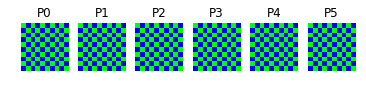

In [10]:
# write your code here
np.random.seed(327)

pattern_size = 10
nr_flips = 0
nr_steps = 5
K = 10

states_as_patterns, pattern_list = hopfield_sim(pattern_size = pattern_size, nr_flips=nr_flips,nr_steps=nr_steps,K=K)
plot_tools.plot_pattern_list(states_as_patterns)

Rerun your script a few times. What do you observe? 
#### [2 points]

Simulation 1 out of 5


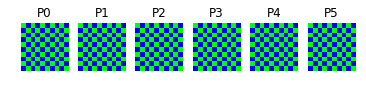

Simulation 2 out of 5


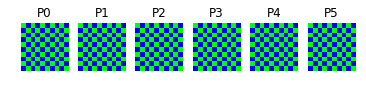

Simulation 3 out of 5


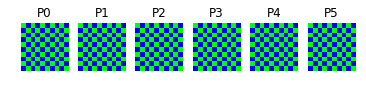

Simulation 4 out of 5


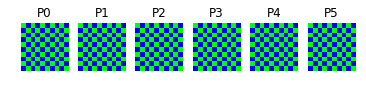

Simulation 5 out of 5


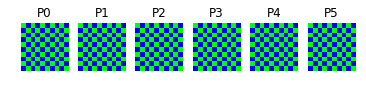

In [11]:
for i in range(5):
    np.random.seed(535+i)
    states_as_patterns, pattern_list = hopfield_sim(pattern_size = pattern_size, nr_flips=nr_flips,nr_steps=nr_steps,K=K)
    print('Simulation {} out of 5'.format(i+1))
    plot_tools.plot_pattern_list(states_as_patterns)

# 8.5. Exercise: Non-random patterns
## 8.5.1. Alphabet.

the alphabet is stored in an object of type: <type 'dict'>
letters are patterns of size: (10L, 10L). Create a network of corresponding size


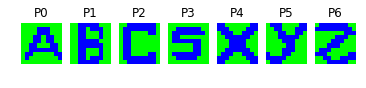

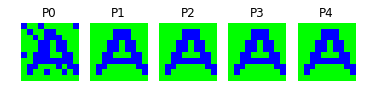

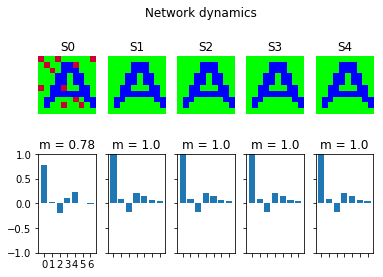

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from neurodynex.hopfield_network import network, pattern_tools, plot_tools
import numpy

# the letters we want to store in the hopfield network
letter_list = ['A', 'B', 'C', 'S', 'X', 'Y', 'Z']

# set a seed to reproduce the same noise in the next run
# numpy.random.seed(123)

abc_dictionary =pattern_tools.load_alphabet()
print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))
# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

# create a list using Pythons List Comprehension syntax:
pattern_list = [abc_dictionary[key] for key in letter_list ]
plot_tools.plot_pattern_list(pattern_list)

# store the patterns
hopfield_net.store_patterns(pattern_list)

# # create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.get_noisy_copy(abc_dictionary['A'], noise_level=0.2)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_pattern_list(states_as_patterns)
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")


## 8.5.2. Add a letter.
#### [2 points]

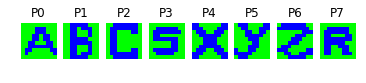

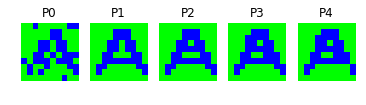

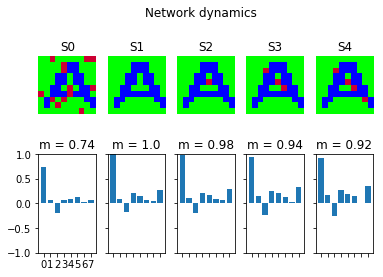

In [13]:
# write your code here
pattern_list.append(abc_dictionary['R'])
plot_tools.plot_pattern_list(pattern_list)

# store the patterns
hopfield_net.store_patterns(pattern_list)

# # create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.get_noisy_copy(abc_dictionary['A'], noise_level=0.2)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_pattern_list(states_as_patterns)
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")


Simulation 1 out of 5


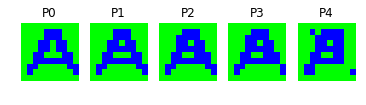

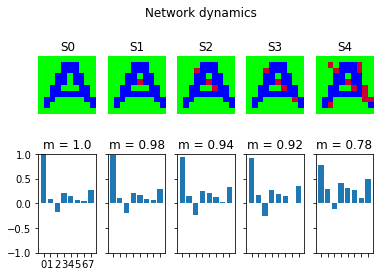

Simulation 2 out of 5


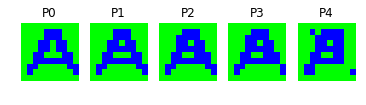

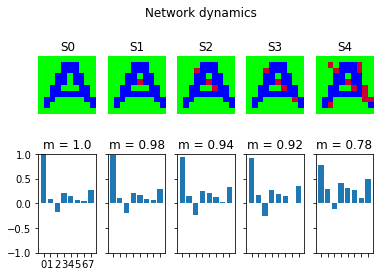

Simulation 3 out of 5


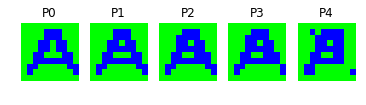

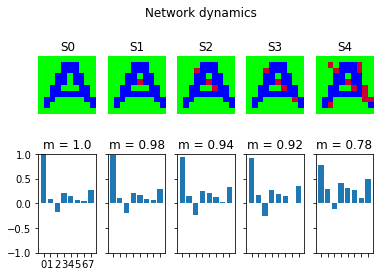

Simulation 4 out of 5


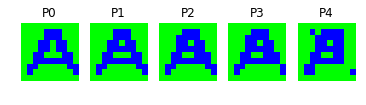

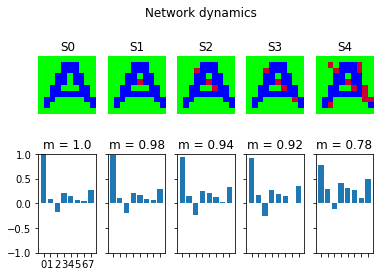

Simulation 5 out of 5


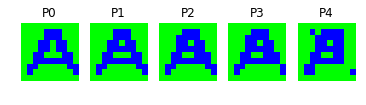

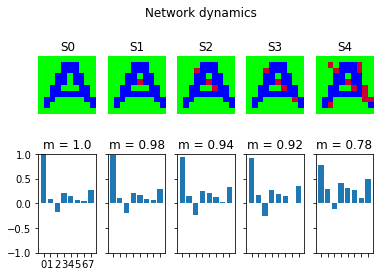

In [14]:
for i in range(5):
    np.random.seed(235+i)
    # # create a noisy version of a pattern and use that to initialize the network
    noisy_init_state = pattern_tools.get_noisy_copy(abc_dictionary['A'], noise_level=0)
    hopfield_net.set_state_from_pattern(noisy_init_state)

    # from this initial state, let the network dynamics evolve.
    states = hopfield_net.run_with_monitoring(nr_steps=4)

    # each network state is a vector. reshape it to the same shape used to create the patterns.
    states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

    # plot the states of the network
    print('Simulation {} out of 5'.format(i+1))
    plot_tools.plot_pattern_list(states_as_patterns)
    plot_tools.plot_state_sequence_and_overlap(
        states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")


Is the pattern ‘A’ still a fixed point? 
Does the overlap between the network state and the reference pattern ‘A’ always decrease? (max 3 lines)
#### [3 points]

#### Once R is added to the list, pattern 'A' is not a fixed point anymore: indeed, when the state is set to the shape A without noise, the evolution of the pattern does not stay in A but at every step is subjected to a few flips that move it away from the starting pattern. 

## 8.5.3. Capacity.
#### [3 points]

#### As before $M_{max}$ = 10

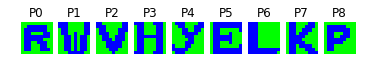

Checking whether R is a fixed point


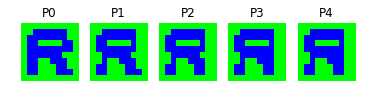

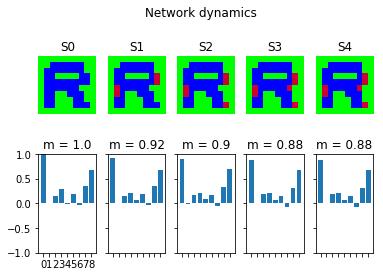

Checking whether W is a fixed point


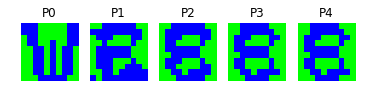

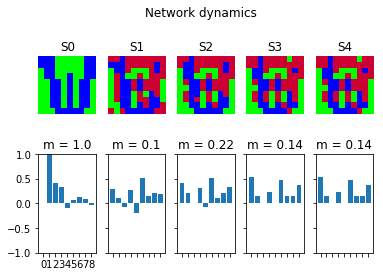

Checking whether V is a fixed point


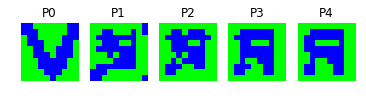

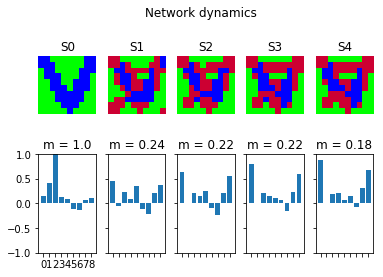

Checking whether H is a fixed point


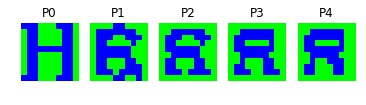

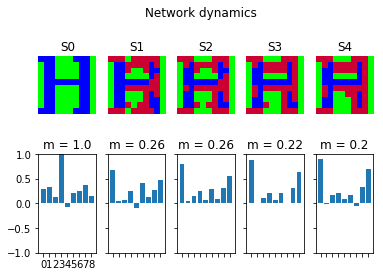

Checking whether Y is a fixed point


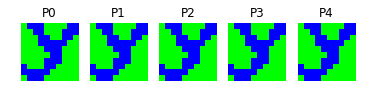

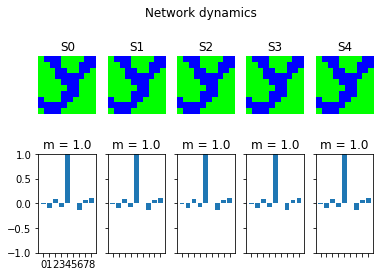

Checking whether E is a fixed point


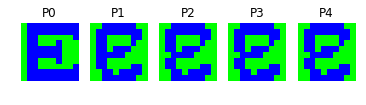

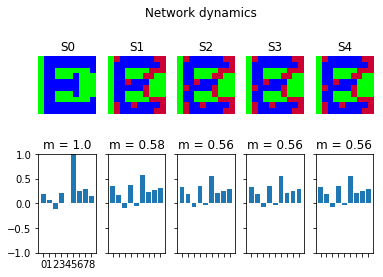

Checking whether L is a fixed point


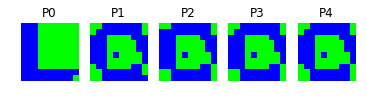

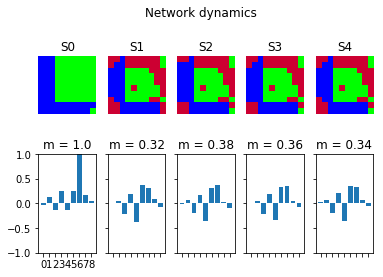

Checking whether K is a fixed point


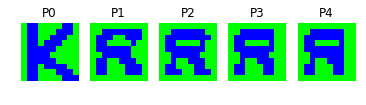

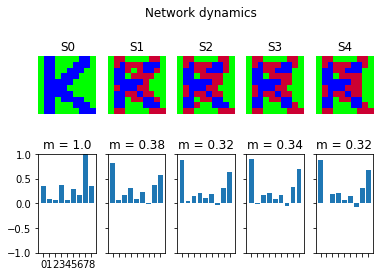

Checking whether P is a fixed point


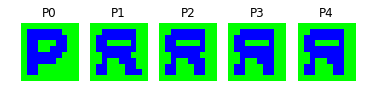

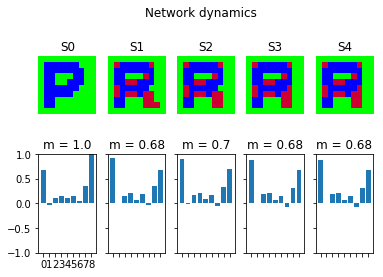

In [15]:
# write your code here
M = 10
alphabet = []
for letter in range(65, 91):
    alphabet.append(chr(letter))
np.random.shuffle(alphabet)
letter_list = alphabet[0:M-1]
pattern_list = [abc_dictionary[key] for key in letter_list ]
plot_tools.plot_pattern_list(pattern_list)

for i in range(0,M-1) :
    # # create a noisy version of a pattern and use that to initialize the network
    noisy_init_state = pattern_tools.get_noisy_copy(abc_dictionary[letter_list[i]], noise_level=0)
    hopfield_net.set_state_from_pattern(noisy_init_state)

    # from this initial state, let the network dynamics evolve.
    states = hopfield_net.run_with_monitoring(nr_steps=4)

    # each network state is a vector. reshape it to the same shape used to create the patterns.
    states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

    # plot the states of the network
    print('Checking whether {} is a fixed point'.format(letter_list[i]))
    plot_tools.plot_pattern_list(states_as_patterns)
    plot_tools.plot_state_sequence_and_overlap(
        states_as_patterns, pattern_list, reference_idx=i, suptitle="Network dynamics")



Explain the discrepancy between the network capacity C (computed above) and your observation. (max 4 lines)
#### [3 points]

#### If the number of patterns is not above the network capacity, all the stored patterns should be fixed points. This is not observed here, because the patterns are not random. TO BE CONTINUED...

# 8.6. Implementing different types of dynamics
### *** Note:*** this exercise is NOT a bonus and it is graded
## 8.6.1. Exercise:
Implement a Hopfield network with asynchronous dynamics (use the function set_dynamics_sign_async()). Store 5 random patterns (take inspiration from exercise 8.3). Fix a noisy initial state, run the network a few times and observe the performance over the different trials.

Parameters: network size=5x5, number of rnd patterns=5, on probability=0.5, number of flips=8.
#### [5 points]

In [16]:
# The function set_dynamics_sign_async() sets the update dynamics to the g(h) =  sign(h) functions. Neurons are updated asynchronously: 
# In random order, all neurons are updated sequentially

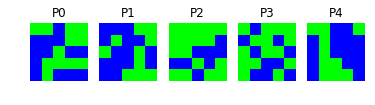

Simulation 1 out of 6


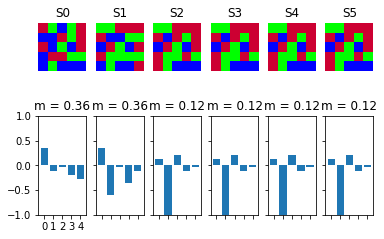

Simulation 2 out of 6


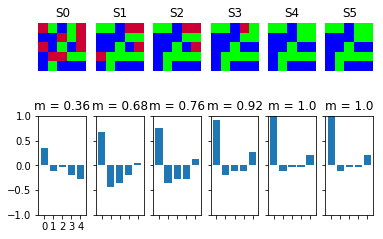

Simulation 3 out of 6


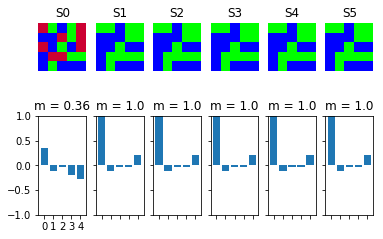

Simulation 4 out of 6


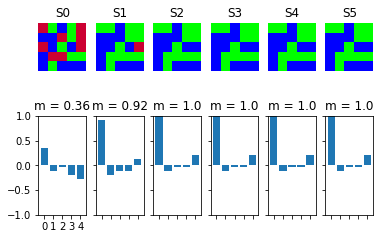

Simulation 5 out of 6


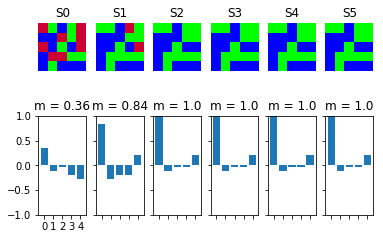

Simulation 6 out of 6


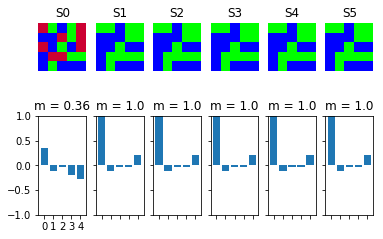

In [17]:
# write your code here
def run_asy_hf(pattern_size, nr_random_patterns, reference_pattern,
                initially_flipped_pixels, nr_iterations, on_probability, nr_sim, random_seed=None):
    
    # instantiate a hofpfield network
    hopfield_net = network.HopfieldNetwork(pattern_size**2)

    # for the demo, use a seed to get a reproducible pattern
    np.random.seed(random_seed)

    # instantiate a pattern factory
    factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
    # create a pattern list with random patterns
    pattern_list = factory.create_random_pattern_list(nr_random_patterns, on_probability)
    plot_tools.plot_pattern_list(pattern_list)
    
    # let the hopfield network "learn" the patterns. 
    hopfield_net.store_patterns(pattern_list)

    # Check the overlaps
    overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
    #plot_tools.plot_overlap_matrix(overlap_matrix)
    # create a noisy version of a pattern and use that to initialize the network
    noisy_init_state = pattern_tools.flip_n(pattern_list[reference_pattern], initially_flipped_pixels)

    # ASYNCHRONOUS network dynamic
    hopfield_net.set_dynamics_sign_async()

    for i in range (nr_sim):
        hopfield_net.set_state_from_pattern(noisy_init_state)  # fix always the same noisy initial state
        print('Simulation {} out of {}'.format(i+1,nr_sim))
        # run the network dynamics and record the network state at every time step
        states = hopfield_net.run_with_monitoring(nr_iterations)
        # each network state is a vector. reshape it to the same shape used to create the patterns.
        states_as_patterns = factory.reshape_patterns(states)
        # plot the states of the network
        plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_pattern)
    
run_asy_hf(pattern_size=5, nr_random_patterns=5, reference_pattern=0,
                initially_flipped_pixels=8, nr_iterations=5, on_probability=0.5, nr_sim = 6, random_seed=138)
#plt.show()


Comment on your results (max 3 lines).
#### [3 points]

#### Since the update is asynchronous (random sequentially update of neurons) at each simulation the dynamics is different. According to the order in which the neurons are updated, the dynamics can lead or not to the recovery of the noiseless pattern. In general the asyncronous update ensures a better pattern retrieval w.r.t. the synchronous one.

## 8.6.2. Stochastic neuron
Implement a synchronous and stochastic neuron. Use the function HopfieldNetwork.set_dynamics_to_user_function() in order to pass _get_sigmoid_update_function(), which you should implement. 

In the stochastic network the dynamics depend on the so-called inverse temperature $\beta$. The temperature in this system can be seen as noise. The activity $S_i(t+1)$ in the next time-step follows the probability distribution: 
\begin{equation}
P\left(S_i(t+1)=1\right) = \frac1{1+\exp\left[-h_i(t)\beta\right]} \qquad \textrm{ where } \qquad h_i(t) = \sum_j w_{ij} S_j(t)
\end{equation}
That is, it is more likely for a neuron $i$ to be set to +1 if its input $h_i$ is higher.

Parameters: network size = 5x5, number of rnd patterns = 5, on probability = 0.5, number of flips = 8, $\beta$=10.

*** Hint 1: *** For inspiration check out the source code of the function _get_sign_update_function()

*** Hint 2: *** In order to implement stochasticity, we suggest to use the python-library numpy.random.

#### [7 points]

In [18]:
# Synchronous stochastic update
def _get_sigmoid_update_function(beta):
    """
    for internal use

    Returns:
        A function implementing a synchronous state update using the sigmoid function (h)
    """
    def upd(state_s0, weights):
        
        h = np.sum(weights*state_s0,axis=1)
        P = 1./(1+np.exp(-h*beta))
        coin = np.random.rand(h.shape[0])
        idxm1 = coin>P
        s1 = np.ones(h.shape[0])
        s1[idxm1] = -1
        
        return s1
    return upd

beta = 10
pattern_size = 5
hopfield_net_stoch = network.HopfieldNetwork(nr_neurons= pattern_size**2)
hopfield_net_stoch.set_dynamics_to_user_function(_get_sigmoid_update_function(beta=beta))

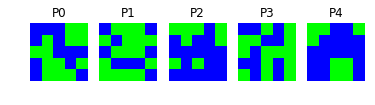

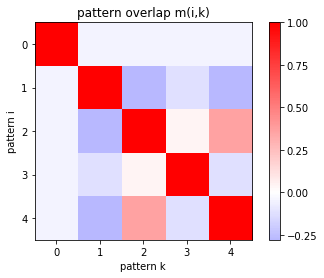

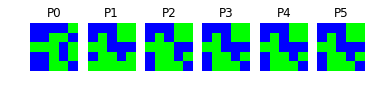

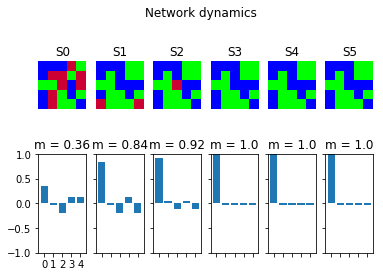

In [19]:
np.random.seed(835)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create the pattern list
pattern_list = factory.create_random_pattern_list(nr_patterns = 5, on_probability = 0.5)

plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net_stoch.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(pattern_list[0], nr_of_flips=8)
hopfield_net_stoch.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net_stoch.run_with_monitoring(nr_steps=5)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_pattern_list(states_as_patterns)
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")


## 8.6.3 Finite temperature
Choose one of the stored patterns (let's say number 1) and flip 10 bits. Then plot the overlap between the network state and this pattern, $m^1$, over time for different values of $\beta$, $\beta\in \left[0.1,2,5,100\right]$.

Parameters: network size = 10x10, number of rnd patterns = 5, on probability = 0.5, number of flips = 10, number of trials = 100, number of steps = 9.

*** Hint 1:***  In order to plot $m^1$ over time, run the script several times and compute the mean  and the standard deviation $\sigma$ of the overlap $m^1$ over trials. You can use the function plt.fill and its parameter $\alpha$ (the transparency), in order to fill with color the area between $+\sigma$ and $-\sigma$.

*** Hint 2: *** Use the function pattern_tools.compute_overlap()

*** Hint 3:*** We suggest to implement and test your code with a smaller network size before getting to the 10x10 units network.
#### [7 points]

<Figure size 432x288 with 0 Axes>

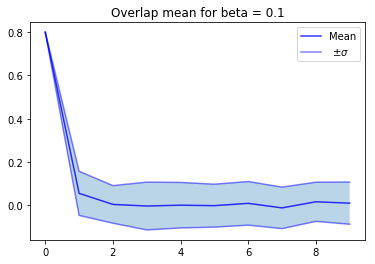

<Figure size 432x288 with 0 Axes>

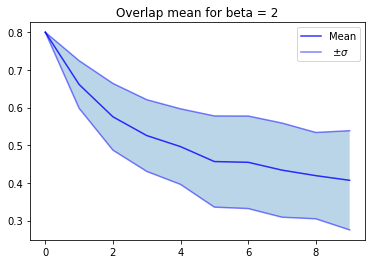

<Figure size 432x288 with 0 Axes>

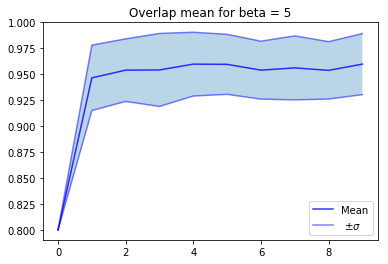

<Figure size 432x288 with 0 Axes>

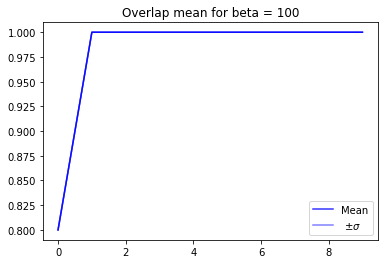

In [64]:
def compute_overlap_over_time(hopfield_net, pattern_list, idx, init_state, nTrials, nr_steps):
    """ For a given hopfield_net and a pattern_list, initialize it with the init_state and run it
    Compute its overlap with the pattern pattern_list[idx] in time (for nr_steps)
    Repeat the above over many trial (nTrials)
    """
    overlap = np.zeros((nTrials,nr_steps+1))
    
    for i in range(0,nTrials):
        
        # learn patterns
        hopfield_net.store_patterns(pattern_list)

        
        # run a synch and stoch Hopfield model with the same initial state
        hopfield_net.set_state_from_pattern(init_state)
        
        # let the netwrok dynamics evolve
        states = hopfield_net.run_with_monitoring(nr_steps=nr_steps)
        states_as_patterns = factory.reshape_patterns(states)
        
        for i_step in range(len(states_as_patterns)):
            overlap[i,i_step] = pattern_tools.compute_overlap(pattern_list[idx],states_as_patterns[i_step])
            
    return overlap


# Create the patterns and store them

np.random.seed(638)
nTrials = 100
nr_steps= 9
betas = [0.1, 2, 5, 100]
pattern_size = 10
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
pattern_list = factory.create_random_pattern_list(nr_patterns=5, on_probability=0.5)
init_state = pattern_tools.flip_n(pattern_list[0],nr_of_flips = 10)

overlap_mean = np.zeros((len(betas), nr_steps+1))
overlap_std = np.zeros((len(betas), nr_steps+1))
for j in range(0, len(betas)):
    
    hopfield_net.set_dynamics_to_user_function(_get_sigmoid_update_function(beta=betas[j]))
    overlap = compute_overlap_over_time(hopfield_net, pattern_list, 0, init_state, nTrials, nr_steps)
    
    overlap_mean[j,:] = np.mean(overlap,axis=0)
    overlap_std[j,:] = np.std(overlap,axis=0)
    
    # Plot
    plt.figure()
    #plt.fill(np.append(range(nr_steps+1),range(nr_steps+1)), np.append((overlap_mean[j]+overlap_std[j]),(overlap_mean[j]-overlap_std[j])),"b")
    #plt.title('Overlap mean for beta = {}'.format(betas[j]))
    #plt.errorbar(range(nr_steps+1),overlap_mean[j],overlap_std[j])
    mean_plus_std = overlap_mean[j,:] + overlap_std[j,:]
    mean_minus_std = overlap_mean[j,:] - overlap_std[j,:]
    ran = range(nr_steps+1)
    
    fig, ax = plt.subplots()

    ax.fill_between(ran, mean_plus_std, mean_minus_std, alpha = 0.3)

    # Outline of the region we've filled in
    ax.plot(ran, overlap_mean[j,:], c='b', alpha=0.8, label='Mean')
    ax.plot(ran, mean_plus_std, c='b', alpha=0.5, label = ' $\pm \sigma$')
    ax.plot(ran, mean_minus_std, c='b', alpha=0.5)
    
    plt.title('Overlap mean for beta = {}'.format(betas[j]))
    plt.legend()
    plt.show()


Comment on your plot (max 5 lines).
#### [5 points]

#### The plots show that when the temperature is very high (i.e. $\beta$ is very small) the overlap decreases as steps are performed: indeed at high temperature the noise of the system is greater, since the probability of $S_i(t+1)=+1 $ approaches 0.5. As a consequence the new pattern is almost a random pattern: the overlap tends to zero since random patterns are nearly orthogonal. Instead, as the temperature decreases ($\beta$ increases) the sigmoid approaches a step function: $\beta \to \infty$ corresponds to a deterministic model that retrieves the pattern in a few time steps, leading thus to overlap = 1 . 

## 8.6.4 Asynchronous stochastic neuron
Implement the stochastic neuron of exercise 8.6.2, but with asynchronous update.

*** Hint: *** For help check out the source code of the function _get_async_sign_update_function()
#### [4 points]

In [21]:
def _get_asynch_sigmoid_update_function(beta):
    """
    for internal use

    Returns:
        A function implementing a asynchronous state update using the sigmoid function
    """
    def upd(state_s0, weights):
        random_neuron_idx_list = np.random.permutation(len(state_s0))
        state_s1 = state_s0.copy()
        
        for i in range(len(random_neuron_idx_list)):
            rand_neuron_i = random_neuron_idx_list[i]
            h_i = np.dot(weights[:, rand_neuron_i], state_s1)
            P = 1./(1+np.exp(-h_i*beta))
            coin = np.random.rand()
            if(coin>P):
                s_i = -1
            else:
                s_i = 1
            state_s1[rand_neuron_i] = s_i 
        return state_s1
    return upd

beta = 10
pattern_size = 5
hopfield_net_asynch_stoch = network.HopfieldNetwork(nr_neurons= pattern_size**2)
hopfield_net_asynch_stoch.set_dynamics_to_user_function(_get_asynch_sigmoid_update_function(beta=beta))

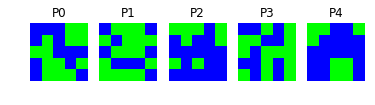

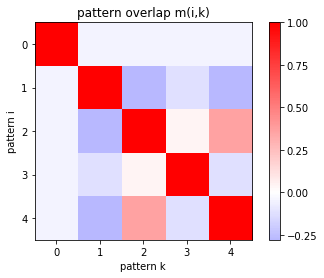

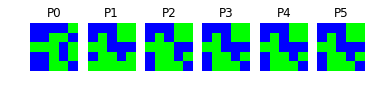

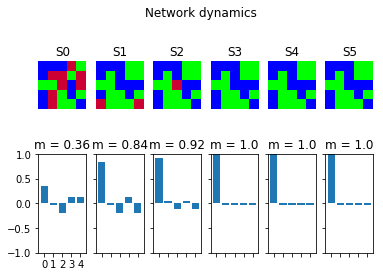

In [22]:
np.random.seed(835)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create the pattern list
pattern_list = factory.create_random_pattern_list(nr_patterns = 5, on_probability = 0.5)

plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net_stoch.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(pattern_list[0], nr_of_flips=8)
hopfield_net_stoch.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net_stoch.run_with_monitoring(nr_steps=5)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_pattern_list(states_as_patterns)
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")


# 8.7 Energy 

## 8.7.1 Exercise
Set up a deterministic and asynchronous Hopfield network and store 3 random patterns. 

The energy can be defined as $E=-\sum_i^N \sum_j^N w_{ij} S_i S_j$. 

Implement a function that calculates the energy according to the above definition. 

Parameters: network size = 10x10, number of rnd patterns = 3, on probability = 0.5.

#### [4 points]

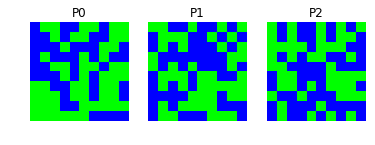

In [29]:
# Set up your network
np.random.seed(439)
pattern_size = 10
hopfield_net = network.HopfieldNetwork(nr_neurons=pattern_size**2)

factory = pattern_tools.PatternFactory(pattern_size,pattern_size)
pattern_list = factory.create_random_pattern_list(nr_patterns=3,on_probability=0.5)
plot_tools.plot_pattern_list(pattern_list)

hopfield_net.store_patterns(pattern_list)

def energy(weight, state):
    E = - np.dot(state,np.dot(weight,state))
    return E


## 8.7.2 Exercise
Compute the energy of one of the stored patterns: $E (\xi^{\mu})$.

Choose one pattern and gradually flip more and more bits. For that you need to implement a function flip_idx, after checking out the function pattern_tools.flip_n(). How does the energy change and why? (max 3 lines)

*** Hint: *** You can get an intuition by plotting the energy of the state as a function of the number of flipped bits.
#### [1 + 6 + 4 points]

The energy of the chosen pattern is -100.56


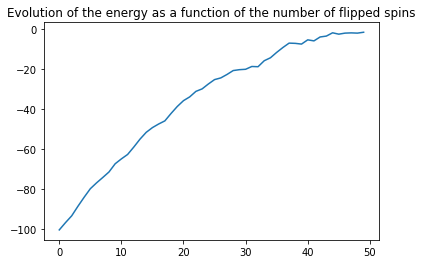

In [30]:
# Initial energy of stored pattern one
hopfield_net.set_state_from_pattern(pattern_list[0]) # choice of the pattern
E = energy(hopfield_net.weights,hopfield_net.state)  # compute its energy
print('The energy of the chosen pattern is {}'.format(E))

nr_tot = pattern_size**2
nr_flips = np.arange(0,nr_tot/2,1)
e_flips = np.zeros(len(nr_flips))

def flip_idx(pattern,nr_of_flips):
    np.random.seed(6)  # setting a seed in the function allows to guarantee that always the same neurons are flipped --> gradual flipping
    return pattern_tools.flip_n(pattern,nr_of_flips)  

# flip up to half of the spins
for i in range(len(nr_flips)):
    
    flipped_pattern = flip_idx(pattern_list[0],nr_flips[i])
    hopfield_net.set_state_from_pattern(flipped_pattern)
    e_flips[i] = energy(hopfield_net.weights,hopfield_net.state)
    
# Plot
plt.plot(nr_flips, e_flips)
plt.title('Evolution of the energy as a function of the number of flipped spins')
plt.show()

your answer

#### Since the three stored patterns are random patterns, they are expected to be fixed points of the dynamics, thus corresponding to minima of the energy. Therefore the flipping of one bit causes an increase in energy, and, as the number of flipped bits gradually increases (up to half of the total bits), so does the energy. This is consistent with the expectations since the starting pattern corresponds to a minimum of the energy.

## 8.7.3 Question.
Compute the energy of the reverse of one of the stored patterns $E(-\xi^1)$. What do you observe, what are the consequences on the dynamics of the system and why? (max 3 lines) 
#### [1 + 3 points]

The energy of the reversed pattern is -100.56, while the one of the original pattern is -100.56


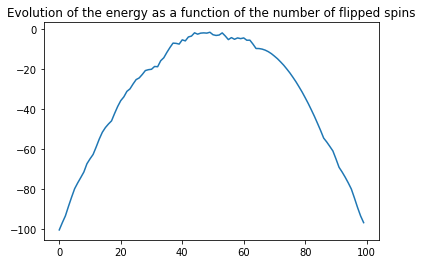

In [31]:
hopfield_net.set_state_from_pattern(pattern_list[0]) # choice of the pattern
E_original = energy(hopfield_net.weights,hopfield_net.state)  # compute its energy
# flip all the bits and store the reversed pattern
nr_flips = pattern_size**2
flipped_pattern = flip_idx(pattern_list[0],nr_flips)
hopfield_net.set_state_from_pattern(flipped_pattern)
# compute the energy of the reversed pattern
E_reversed = energy(hopfield_net.weights,hopfield_net.state)

# display the result
print('The energy of the reversed pattern is {}, while the one of the original pattern is {}'.format(E_reversed,E_original))

nr_flips = np.arange(0,nr_tot,1)
e_flips = np.zeros(len(nr_flips))
# flip half of the spins
for i in range(len(nr_flips)):
    
    flipped_pattern = flip_idx(pattern_list[0],nr_flips[i])
    hopfield_net.set_state_from_pattern(flipped_pattern)
    e_flips[i] = energy(hopfield_net.weights,hopfield_net.state)
    
# Plot
plt.plot(nr_flips, e_flips)
plt.title('Evolution of the energy as a function of the number of flipped spins')
plt.show()
 

#### The energy of the pattern having all the bits flipped is observed to be the same as the energy of the original pattern. Therefore, also the former corresponds to a local minimum of the energy for the system. The dynamics of the system, as a consequence, will tend to retrieve the starting pattern when up to half of the bits are flipped, and the reverse pattern when more than half are flipped. 

## 8.7.4 Exercise.
1 - Initialize the network with the state $S_0 = sgn(\sum_{\mu}^3 \xi^{\mu})$ and run the dynamics. What is the energy of this state?

Parameters: number steps = 4.

#### [2 points]

The energy of the pattern s_0 is -67.92


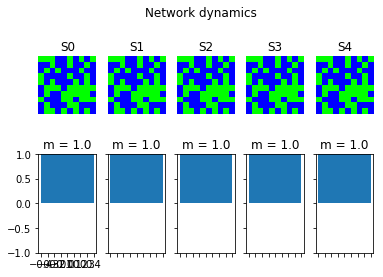

The energy of the pattern retrieved by the model after 4 steps is -67.92


In [34]:
# write your code here
s_0 = np.sign(pattern_list[0]+pattern_list[1]+pattern_list[2])
hopfield_net.set_state_from_pattern(s_0)
hopfield_net.set_dynamics_sign_async()     # the dynamics is set to deterministic and asynchronous
E_s_0 = energy(hopfield_net.weights,hopfield_net.state)
print('The energy of the pattern s_0 is {}'.format(E_s_0))

nr_steps = 4

states = hopfield_net.run_with_monitoring(nr_steps=nr_steps)
states_as_patterns = factory.reshape_patterns(states)
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, [s_0], reference_idx=0, suptitle="Network dynamics")

E_final = energy(hopfield_net.weights,hopfield_net.state)
print('The energy of the pattern retrieved by the model after 4 steps is {}'.format(E_final))



2 - Consider the ensemble of all states that differ from $S_0$ in exactly one flip. Initialize the network in each of those states and check what is the final state of the dynamical evolution.

*** Hint: *** Compare the final states with $S_0$.
#### [8 points]

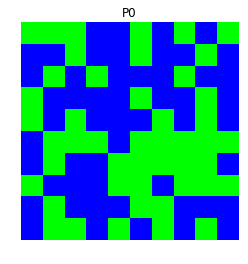

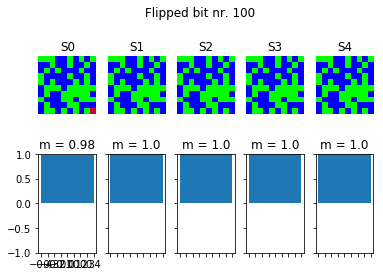

From the ensemble of 100 states differing from s_0 in exactly one bit, the pattern s_0 is retrieved 100 times


In [39]:
# Function to flip one neuron
def flip_idx(template, idx):
    """
    makes a copy of the template pattern and flips the idx-th state.
    Args:
        template:
        idx:
    Returns:
        a new pattern
    """
    linear_template = template.flatten()
    linear_template[idx] = -linear_template[idx]
    return linear_template.reshape(template.shape)


# Flip all neurons one after the other
plot_tools.plot_pattern_list([s_0])
ovlp = np.zeros(pattern_size**2)
for i in range(pattern_size**2):
    
    s_0_flipped = flip_idx(s_0, i)
    hopfield_net.set_state_from_pattern(s_0_flipped)
    # from this initial state, let the network dynamics evolve.
    states = hopfield_net.run_with_monitoring(nr_steps=4)

    # each network state is a vector. reshape it to the same shape used to create the patterns.
    states_as_patterns = factory.reshape_patterns(states)
    
    ovlp[i] = pattern_tools.compute_overlap(s_0, states_as_patterns[-1])

# plot one of the 100 dynamics
plot_tools.plot_state_sequence_and_overlap(states_as_patterns,[s_0],reference_idx=0,suptitle="Flipped bit nr. 100")

# check how many of the 100 dynamics converge to s_0
count = np.sum(ovlp==1)
print("From the ensemble of 100 states differing from s_0 in exactly one bit, the pattern s_0 is retrieved {} times".format(count))

3 - What can you tell about the stability of $S_0$? Briefly comment (max 5 lines). 

***Hint:*** For help, refer to the pdf on associative memory on the MOODLE (https://moodle.epfl.ch/pluginfile.php/1091071/mod_resource/content/0/Lecture5/Hertz_Hopfield.pdf).

#### [6 points]

your answer

#### The graphs in point 1 show that the mixture state s_0 is a fixed point: the dynamics does not move away from the state when the system is let free to evolve. Furthermore the graph in point 2 shows that s_0 is a stable fixed point: it is an attractor since if one bit is flipped the dynamics will retrieve s_0. This is consistent with the expectation: s_0, being a linear combination of an odd number of stored patterns ($\xi^{mix}_i=sign(\xi_i^{\mu 1}+\xi_i^{\mu 2}+\xi_i^{\mu 3})$) adds a local minimum of the energy of the system, called spurious minimum. Indeed the stability condition $sign(h_i^{mix}) = sign(\frac{1}{2}\xi_i^{\mu 1}+\frac{1}{2}\xi_i^{\mu 2}+\frac{1}{2}\xi_i^{\mu 3}) = \xi_i^{mix}$ is satisfied.

## 8.7.5 Question.
Does your argumentation above hold in the case of $S_0 = sgn(\sum_{\mu}^2 \xi^{\mu})$? Why? (max 3 lines)
#### [3 points]

#### The arguments above on the stability condition of a mixture state are valid only for a combination of an odd number of patterns. They do not hold, instead, for a combination of an even number of patterns since it could add up to zero on some sites, while the bits can only have values + 1 or -1. Thus in the case given in the question the argumentation does not hold.

## 8.7.6 Exercise.
Use now the stochastic neuron with asynchronous update you implemented in 8.6.4. Initialize the network with the state $S_0 = sgn(\sum_{\mu}^3 \xi^{\mu})$. For $\beta$ varying in $\beta\in \left[1,2,8,10,100\right]$, plot the overlap of the network initialized with $S_0$ with each of the 3 stored patterns as a function of time. 

What do you observe? Comment on the stability of the spurious state $S_0$ in each case. (max 4 lines)

Parameters: network size = 10x10, number of rnd patterns = 3, on probability = 0.5, number of steps = 9.

*** Hint 1: *** Make 4 plots (or 1 plot with 4 subplots), one for each value of $\beta$.

*** Hint 2: *** You can use the function pattern_tools.compute_overlap_list (or pattern_tools.compute_overlap).
#### [5 + 4 points]

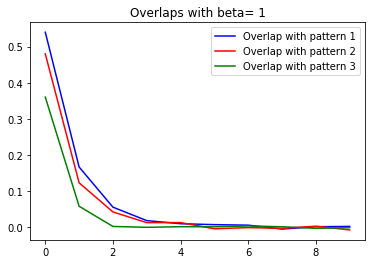

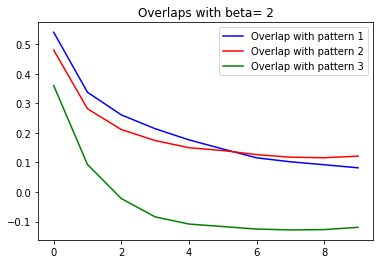

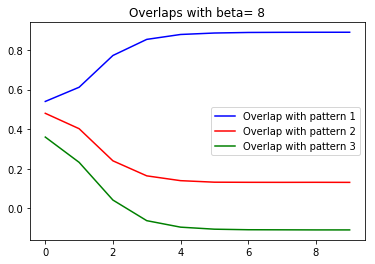

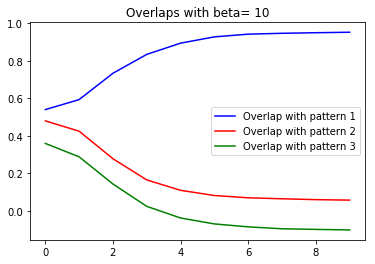

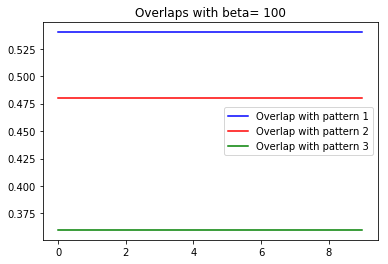

In [70]:
betas = [1,2,8,10,100]
pattern_size = 10
nr_rnd_patterns = 3
on_probability = 0.5
nr_steps = 9

np.random.seed(357)

hopfield_net = network.HopfieldNetwork(pattern_size**2)
factory = pattern_tools.PatternFactory(pattern_size,pattern_size)
pattern_list = factory.create_random_pattern_list(nr_rnd_patterns,on_probability)
s_0 = np.sign(pattern_list[0]+pattern_list[1]+pattern_list[2])


for j in range(len(betas)):
    
    hopfield_net.set_dynamics_to_user_function(_get_asynch_sigmoid_update_function(beta=betas[j]))
    overlap_0 = compute_overlap_over_time(hopfield_net, pattern_list, 0, s_0, 1000, nr_steps)
    overlap_1 = compute_overlap_over_time(hopfield_net, pattern_list, 1, s_0, 1000, nr_steps)
    overlap_2 = compute_overlap_over_time(hopfield_net, pattern_list, 2, s_0, 1000, nr_steps)
    
    overlap_mean_0 = np.mean(overlap_0,axis=0)
    overlap_mean_1 = np.mean(overlap_1,axis=0)
    overlap_mean_2 = np.mean(overlap_2,axis=0)
        

    plt.figure()
    plt.title("Overlaps with beta= {}".format(betas[j]))
    plt.plot(range(nr_steps+1),overlap_mean_0,'b', label = 'Overlap with pattern 1')
    plt.plot(range(nr_steps+1),overlap_mean_1,'r', label = 'Overlap with pattern 2')
    plt.plot(range(nr_steps+1),overlap_mean_2,'g', label = 'Overlap with pattern 3')
    plt.legend()
    plt.show()
    


your answer

#### At high temperatures ($\beta=1$) the noise significantly affects the dynamics of the system, making it evolve towards random patterns, thus with approximately null overlap with the stored patterns. As temperature decreases ($\beta=8,10$) the system tends towards the basin of attraction of one of the patterns: the overlap with this one tends to 1, while with the others tends to 0. For these cases s_0 is not stable. If $\beta$ further increases ($\beta=100$) the model becomes deterministic: it stays in the basin of attraction of s_0 (s_0 stable) and the overlap with the three patterns is constant. 